# This Document is for Sound Augmentation

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython
import imgaug 
import imgaug.augmenters as iaa
import os
import re
import warnings


plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [0]:
print(tf.__version__)

2.1.0


#### Utils

In [0]:
def plot_audio(y):
  plt.figure(figsize=(20,8))
  plt.title('Audio x:Time y:Frequency')
  plt.plot(y)
  plt.show()


## Test Audios


In [0]:
audio_file_1 = 'data/1/1_0000.wav'
audio_file_2 = 'data/1/1_0001.wav'

In [0]:
# Audio File : 1

IPython.display.Audio(audio_file_1)

In [0]:
# Audio File : 2

IPython.display.Audio(audio_file_2)

# 1) Audio Speed Augmentation


In [0]:
# Checking its array and sr

y1, sr1 = librosa.load(audio_file_1, sr=44100)
y2, sr2 = librosa.load(audio_file_2, sr=44100)

In [0]:
print('Audio 1')
print(y1.shape)
print(sr1)
print()
print('Audio 2')
print(y2.shape)
print(sr2)


Audio 1
(155520,)
44100

Audio 2
(175173,)
44100


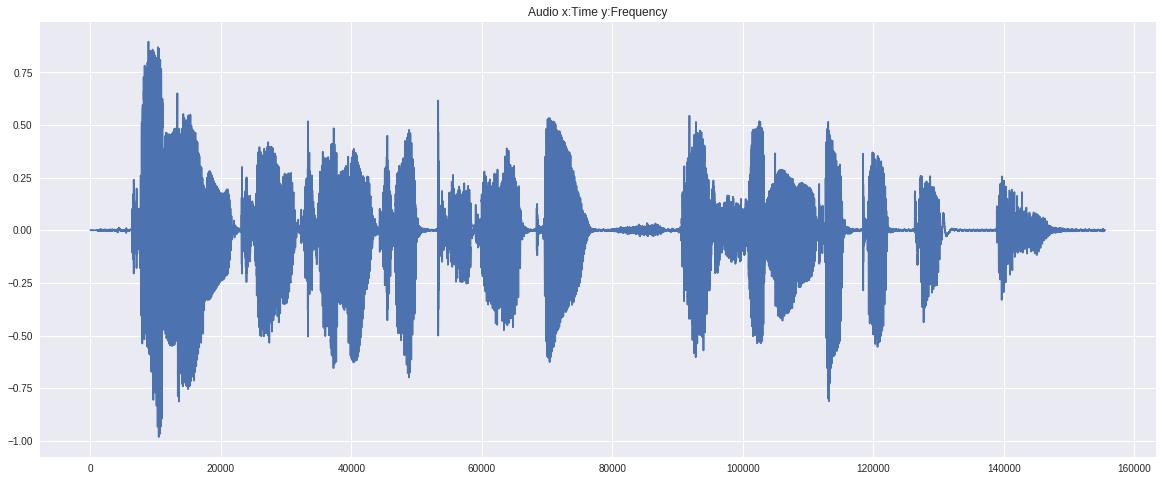

In [0]:
# Original Audio Frequency plot : Audio 1


plot_audio(y1)

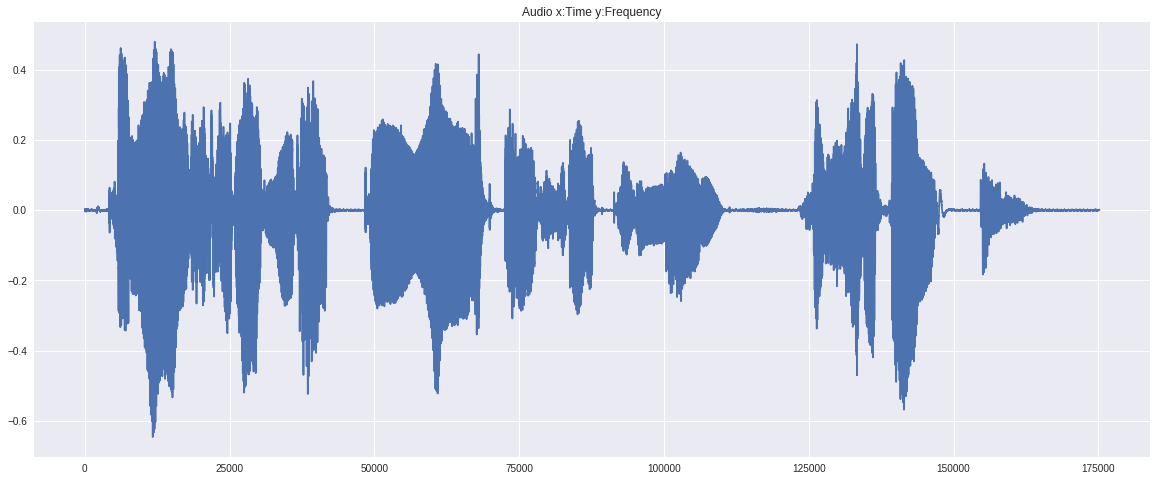

In [0]:
# Original Audio Frequency plot : Audio 2


plot_audio(y2)

In [0]:
# Audio Speed augmentation

# slow audio 50%  (-50%)
y1_stretch_slow_fifty = librosa.effects.time_stretch(y1, rate=0.5)
y1_sr_slow = sr1 + (sr1 * 0.5)

In [0]:
y1_stretch.shape

(311040,)

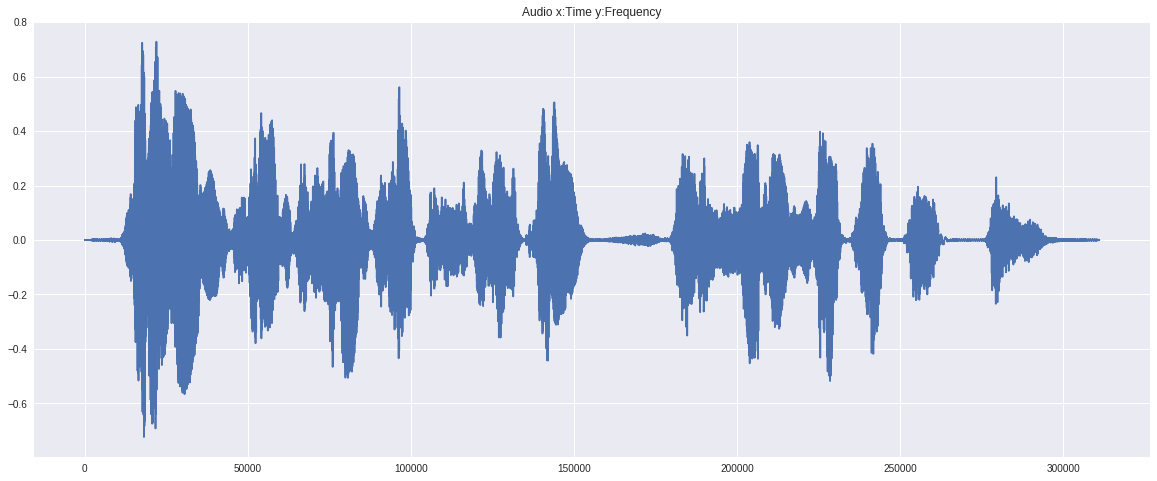

In [0]:
plot_audio(y1_stretch)

In [0]:
IPython.display.Audio(y1_stretch_slow_fifty , rate=44100)

In [0]:
# Audio Speed augmentation

# fast audio 50%  (+50%)
y1_stretch_fast_fifty = librosa.effects.time_stretch(y1, rate=1.5)
y1_sr_fast= sr1 + (sr1 * 1.5)

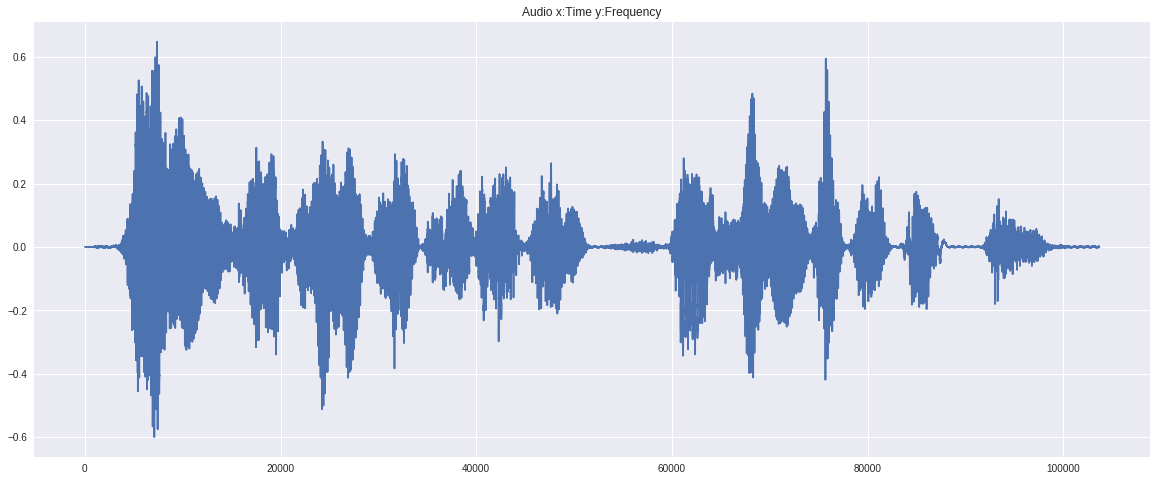

In [0]:
plot_audio(y1_stretch_fast_fifty)

In [0]:
IPython.display.Audio(y1_stretch_fast_fifty , rate=44100)

## Audio Speed Difference Contrast

In [0]:
print('Text : 그는 괜찮은척 하려고 애쓰는척 하였다\n')
print('Original File 1')
display(IPython.display.Audio(audio_file_1))
print()
print('Slow 50%')
display(IPython.display.Audio(y1_stretch_slow_fifty , rate=44100))
print()
print('Fast 50%')
display(IPython.display.Audio(y1_stretch_fast_fifty , rate=44100))

Text : 그는 괜찮은척 하려고 애쓰는척 하였다

Original File 1



Slow 50%



Fast 50%


In [0]:
librosa.output.write_wav('slow_50.wav', y1_stretch_slow_fifty, sr=44100)
librosa.output.write_wav('fast_50.wav', y1_stretch_fast_fifty, sr=44100)

# 2) Audio Pitch Augmentation

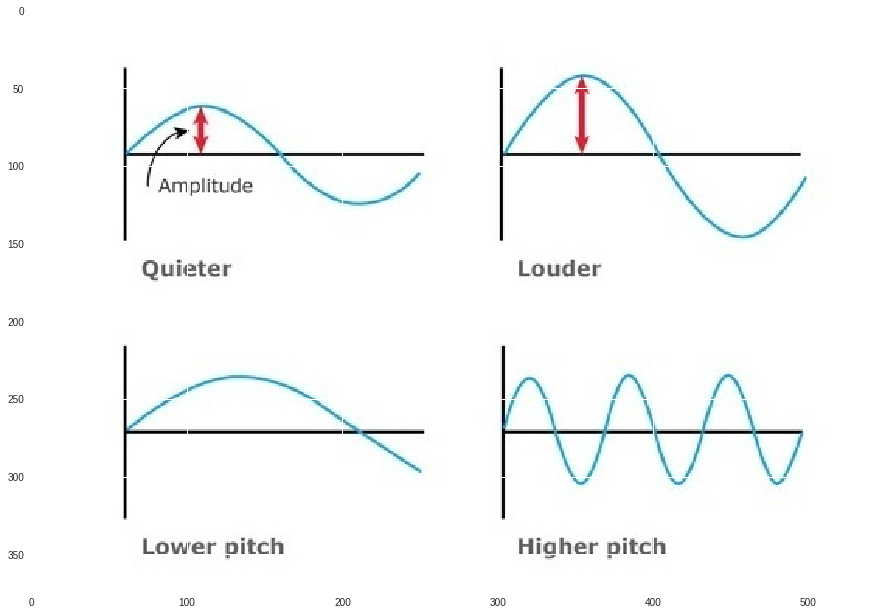

In [0]:
plt.figure(figsize=(15,15))
pitch_difference_img = plt.imread('Pictures/Screenshot from 2020-02-24 14-05-13.png')
plt.imshow(pitch_difference_img)
plt.show()

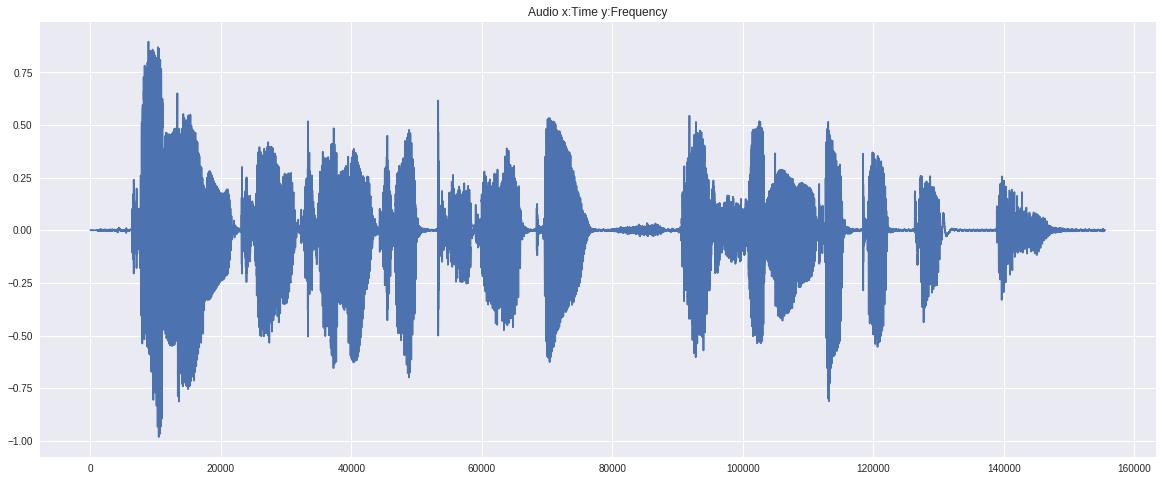

In [0]:
plot_audio(y1) # Original Sound

In [0]:
y1_pitch_1 = librosa.effects.pitch_shift(y1, sr1, n_steps=-6)

In [0]:
y1_pitch_1.shape

(155520,)

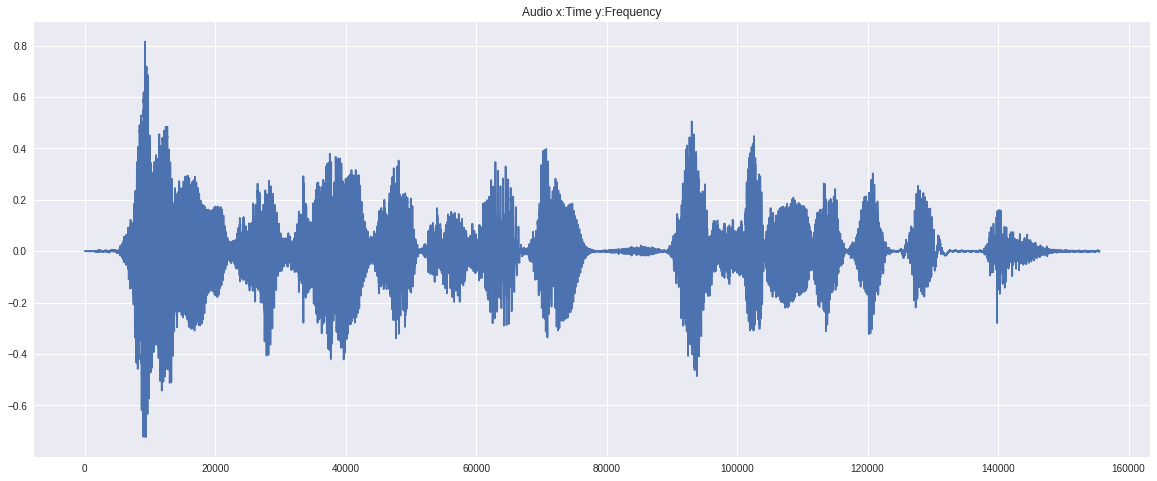

In [0]:
plot_audio(y1_pitch_down)

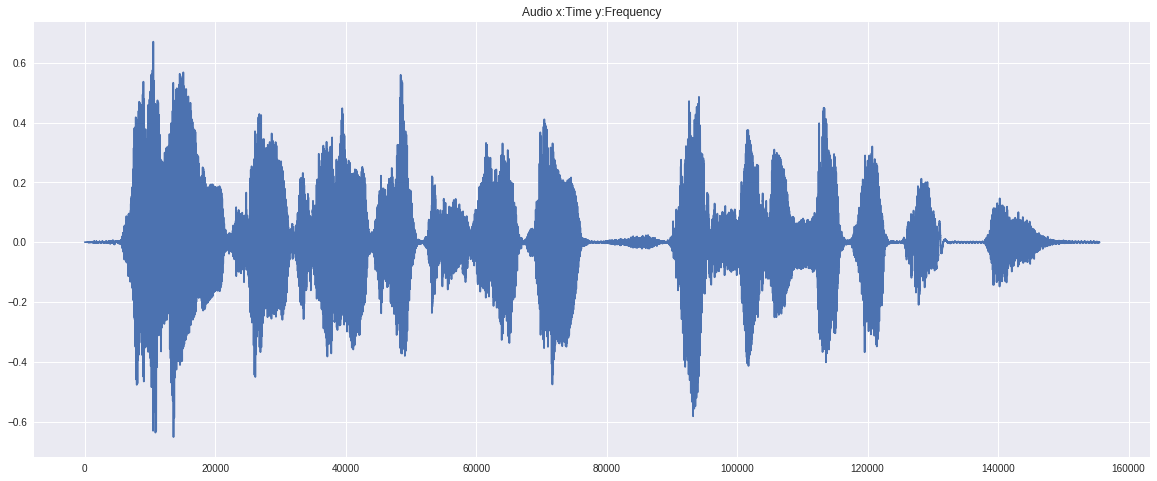

In [0]:
plot_audio(y1_pitch_up)

In [0]:
IPython.display.Audio(y1_pitch_1, rate=44100)

In [0]:
y1[:10]

array([ 0.0000000e+00,  3.0517578e-05, -4.5776367e-05,  4.5776367e-05,
       -4.5776367e-05,  3.0517578e-05,  0.0000000e+00, -1.5258789e-05,
        1.5258789e-05, -1.5258789e-05], dtype=float32)

In [0]:
y1_pitch_1[:10]

array([ 2.2175143e-06,  5.3825541e-05, -8.7871349e-06, -3.4489520e-05,
        2.9410176e-05, -2.1582191e-06, -4.9141847e-05,  2.3018707e-05,
        4.2857293e-05, -2.6339345e-05], dtype=float32)

In [0]:
y1_pitch_down = librosa.effects.pitch_shift(y1, sr1, n_steps= -6)
y1_pitch_up = librosa.effects.pitch_shift(y1, sr1, n_steps= 6)

## Audio Pitch Difference Contrast

In [0]:
print('Text : 그는 괜찮은척 하려고 애쓰는척 하였다\n')
print('Original File 1')
display(IPython.display.Audio(audio_file_1))
print()
print('Pitch Down  6')
display(IPython.display.Audio(y1_pitch_down , rate=44100))
print()
print('Pitch Up 6')
display(IPython.display.Audio(y1_pitch_up , rate=44100))

Text : 그는 괜찮은척 하려고 애쓰는척 하였다

Original File 1



Pitch Down  6



Pitch Up 6


In [0]:
librosa.output.write_wav('pitch_up_6.wav', y1_pitch_up, sr=44100)
librosa.output.write_wav('pitch_down_6.wav', y1_pitch_down, sr=44100)

# 3) Audio Augmentation by Noise Injection

In [0]:
noise = np.random.randn(len(y1))

In [0]:
noise

array([ 1.23557728, -0.35238977, -1.29793192, ...,  0.52856791,
        0.50025072,  0.95074115])

In [0]:
noise_injected = y1 + 0.1 * noise

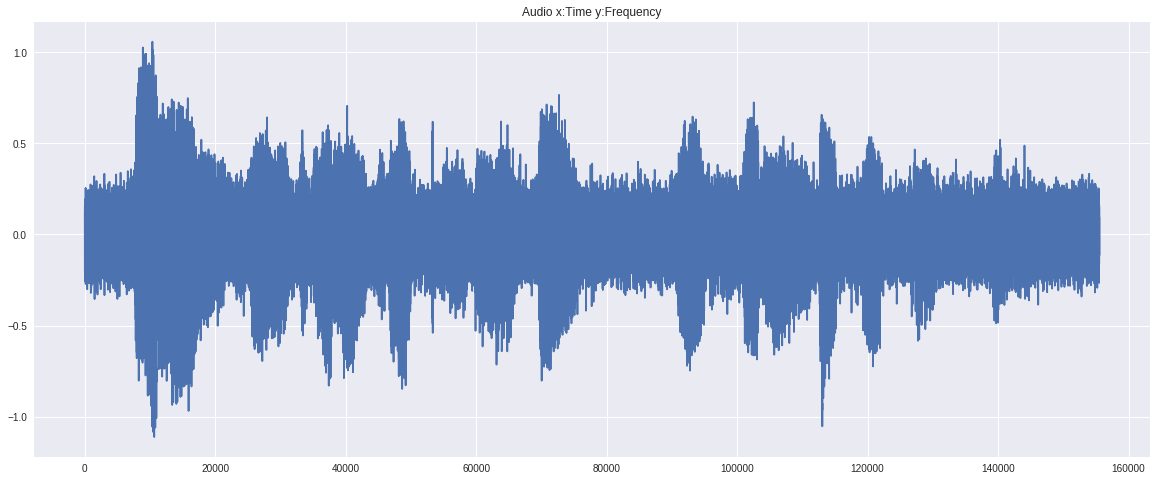

In [0]:
plot_audio(noise_injected)

In [0]:
IPython.display.Audio(noise_injected, rate=44100)

In [0]:
print('Text : 그는 괜찮은척 하려고 애쓰는척 하였다\n')
print('Original File 1')
display(IPython.display.Audio(audio_file_1))
print()
print('10% Noise Injected')
display(IPython.display.Audio(noise_injected , rate=44100))

Text : 그는 괜찮은척 하려고 애쓰는척 하였다

Original File 1



10% Noise Injected


In [0]:
librosa.output.write_wav('noise_add.wav', noise_injected, sr=44100)

# 4) Audio WAV to Mono-Image & Image Augmentation

- Convert the Audio File with STFT -> Mel-Filters -> Mel-Spectrogram

In [0]:
y1.shape

(155520,)

In [0]:
# Convert wav to image

y, sr = librosa.load(audio_file_1, sr=44100)

y, _ = librosa.effects.trim(y) # Remove Silence

spectrogram = librosa.feature.melspectrogram(y, sr=44100, n_fft=256*20, hop_length=150*3, window='hann', n_mels=256) # Extract STFT - Mel Spectrogram

spectrogram = librosa.power_to_db(spectrogram) # Shift to decibel based

spectrogram = spectrogram.astype(np.float32) 

In [0]:
spectrogram.shape

(256, 345)

In [0]:
# hop length 335 * 3 == 155
# hop length 330 * 3 == 157

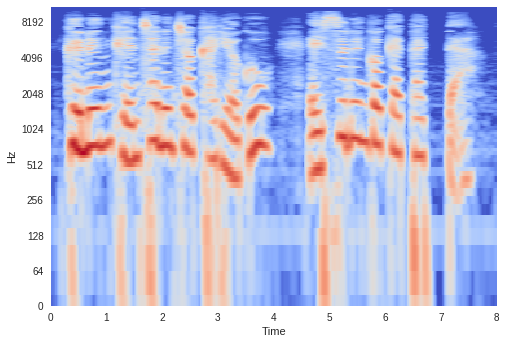

In [0]:
# Brief Spectrogram Image
librosa.display.specshow(spectrogram, x_axis='time', y_axis='log')

In [0]:
specgrotram_channel = np.stack([spectrogram, spectrogram, spectrogram], axis=-1)


spec_mean = specgrotram_channel.mean()
spec_std = specgrotram_channel.std()
eps = 1e-6

# Standardization
specgrotram_channel = (specgrotram_channel - spec_mean) / spec_std + eps

norm_min, norm_max = specgrotram_channel.min(), specgrotram_channel.max()

if (norm_max - norm_min) > eps:
  v = specgrotram_channel
  v[v < norm_min] = norm_min
  v[v > norm_max] = norm_max
  v = 255 * (v - norm_min) / (norm_max - norm_min)
  v = v.astype(np.uint8)
else:
  v = np.zeros_like(specgrotram_channel, dtype=np.uint8)

In [0]:
v.shape

(256, 345, 3)

In [0]:
IPython.display.Audio(y1, rate=44100)

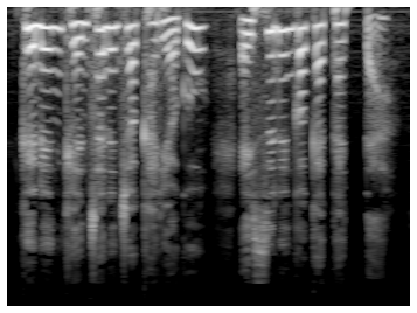

In [0]:
# plt.title('Audio Convert to Image')
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.grid(False)
ax.imshow(v)
ax.axis('off')
fig.show()
fig.savefig('test.png')

In [0]:
img = plt.imread('test.png')

# 5) Audio WAV to Mono-Image & Image Augmentation (MFCC)

- Convert the Audio File with STFT -> Mel-Filters -> Mel-Spectrogram -> MFCC

In [0]:
# Convert wav to image

y, sr = librosa.load(audio_file_1, sr=44100)

y, _ = librosa.effects.trim(y) # Remove Silence

spectrogram = librosa.feature.mfcc(y, sr=44100, n_mfcc=256*20, hop_length=150*3, window='hann', n_mels=256) # Extract STFT - Mel Spectrogram

spectrogram = librosa.power_to_db(spectrogram) # Shift to decibel based

spectrogram = spectrogram.astype(np.float32) 

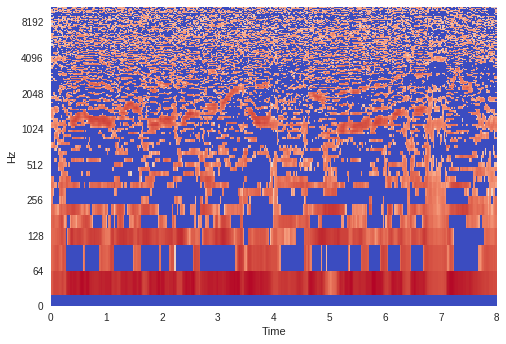

In [0]:
# Brief Spectrogram Image
librosa.display.specshow(spectrogram, x_axis='time', y_axis='log')

In [0]:
specgrotram_channel = np.stack([spectrogram, spectrogram, spectrogram], axis=-1)


spec_mean = specgrotram_channel.mean()
spec_std = specgrotram_channel.std()
eps = 1e-6

# Standardization
specgrotram_channel = (specgrotram_channel - spec_mean) / spec_std + eps

norm_min, norm_max = specgrotram_channel.min(), specgrotram_channel.max()

if (norm_max - norm_min) > eps:
  v = specgrotram_channel
  v[v < norm_min] = norm_min
  v[v > norm_max] = norm_max
  v = 255 * (v - norm_min) / (norm_max - norm_min)
  v = v.astype(np.uint8)
else:
  v = np.zeros_like(specgrotram_channel, dtype=np.uint8)

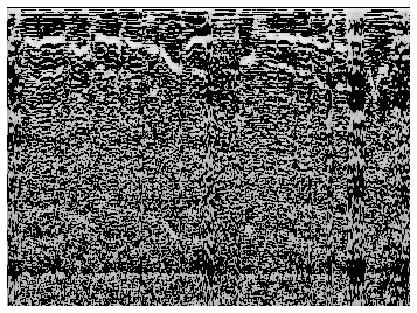

In [0]:
# plt.title('Audio Convert to Image')
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.grid(False)
ax.imshow(v)
ax.axis('off')
fig.show()
fig.savefig('mfcc.png')